## Decision Tree Task

### 약물 A, B, C, X, Y
##### 다중 분류(Multiclass Classification)
- 의학 연구원으로서 동일한 질병을 앓고 있는 일련의 환자에 대한 데이터를 수집했다.
- 치료 과정 동안 각 환자는 5가지 약물, 즉 약물 A, 약물 B, 약물 c, 약물 x 및 y 중 하나에 반응했다.
-  미래에 동일한 질병을 앓는 환자에게 어떤 약물이 적합할 수 있는지 알아보기 위한 모델을 구축한다.

In [3]:
import pandas as pd

path = './datasets/drugs.csv'
d_df = pd.read_csv(path)
d_df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [4]:
# 데이터 전처리 작업
# 결측치, 이상치, 중복행 확인
# Na_to_K 표준화 작업 (표준화 작업 시 -1.96 ~ 1.96 정상치)
# 데이터 분석이 되지 않아서 범주형 데이터를 전부 숫자로 치환
# 데이터 프레임 분리

# d_df['Sex'].value_counts() # M: 0, F: 1
# d_df['BP'].value_counts() # LOW:-1 , NORMAL: 0, HIGH: 1
# d_df['Cholesterol'].value_counts() # NORMAL:0, HIGH : 1 
d_need_df=d_df.copy()

In [5]:
# 결측치 확인 -> 없음
d_need_df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [11]:
# 중복행 확인 -> 없음
d_need_df[d_need_df.duplicated()]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug


In [18]:
# 이상치 확인(나이, 나트륨/칼륨)-> 나이: 특이사항 없음, 나트륨/칼륨: 

# 나이 사분위수 확인 max, min 값 확인
d_need_df[['Age']].describe().T

# 나트륨/칼륨 표준화를 통한 이상치 확인 

,count,mean,std,min,25%,50%,75%,max
Age,200.0,44.315,16.544315,15.0,31.0,45.0,58.0,74.0


In [3]:
def change_Sex(x):
    if x== 'M':
        return '0'
    if x == 'F':
        return '1'

In [4]:
d_need_df['Sex']= d_need_df['Sex'].apply(change_Sex)
d_need_df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,HIGH,HIGH,25.355,drugY
1,47,0,LOW,HIGH,13.093,drugC
2,47,0,LOW,HIGH,10.114,drugC
3,28,1,NORMAL,HIGH,7.798,drugX
4,61,1,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,1,LOW,HIGH,11.567,drugC
196,16,0,LOW,HIGH,12.006,drugC
197,52,0,NORMAL,HIGH,9.894,drugX
198,23,0,NORMAL,NORMAL,14.020,drugX


In [5]:
def change_BP(x):
    if x== 'LOW':
        return -1
    if x == 'NORMAL':
        return 0
    if x == 'HIGH':
        return 1

In [6]:
d_need_df['BP']= d_need_df['BP'].apply(change_BP)
d_need_df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,1,HIGH,25.355,drugY
1,47,0,-1,HIGH,13.093,drugC
2,47,0,-1,HIGH,10.114,drugC
3,28,1,0,HIGH,7.798,drugX
4,61,1,-1,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,1,-1,HIGH,11.567,drugC
196,16,0,-1,HIGH,12.006,drugC
197,52,0,0,HIGH,9.894,drugX
198,23,0,0,NORMAL,14.020,drugX


In [7]:
def change_Cholesterol(x):
    if x== 'NORMAL':
        return 0
    if x == 'HIGH':
        return 1

In [8]:
d_need_df['Cholesterol']= d_need_df['Cholesterol'].apply(change_Cholesterol)
d_need_df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,1,1,25.355,drugY
1,47,0,-1,1,13.093,drugC
2,47,0,-1,1,10.114,drugC
3,28,1,0,1,7.798,drugX
4,61,1,-1,1,18.043,drugY
...,...,...,...,...,...,...
195,56,1,-1,1,11.567,drugC
196,16,0,-1,1,12.006,drugC
197,52,0,0,1,9.894,drugX
198,23,0,0,0,14.020,drugX


In [9]:
features = d_need_df.iloc[:,:-1].values
targets = d_df.iloc[:,-1].values
display(features)
targets

array([[23, '1', 1, 1, 25.355],
       [47, '0', -1, 1, 13.093],
       [47, '0', -1, 1, 10.114],
       [28, '1', 0, 1, 7.798],
       [61, '1', -1, 1, 18.043],
       [22, '1', 0, 1, 8.607],
       [49, '1', 0, 1, 16.275],
       [41, '0', -1, 1, 11.037],
       [60, '0', 0, 1, 15.171],
       [43, '0', -1, 0, 19.368],
       [47, '1', -1, 1, 11.767],
       [34, '1', 1, 0, 19.199],
       [43, '0', -1, 1, 15.376],
       [74, '1', -1, 1, 20.942],
       [50, '1', 0, 1, 12.703],
       [16, '1', 1, 0, 15.516],
       [69, '0', -1, 0, 11.455],
       [43, '0', 1, 1, 13.972],
       [23, '0', -1, 1, 7.298],
       [32, '1', 1, 0, 25.974],
       [57, '0', -1, 0, 19.128],
       [63, '0', 0, 1, 25.917],
       [47, '0', -1, 0, 30.568],
       [48, '1', -1, 1, 15.036],
       [33, '1', -1, 1, 33.486],
       [28, '1', 1, 0, 18.809],
       [31, '0', 1, 1, 30.366],
       [49, '1', 0, 0, 9.381],
       [39, '1', -1, 0, 22.697],
       [45, '0', -1, 1, 17.951],
       [18, '1', 0, 0, 8.75]

array(['drugY', 'drugC', 'drugC', 'drugX', 'drugY', 'drugX', 'drugY',
       'drugC', 'drugY', 'drugY', 'drugC', 'drugY', 'drugY', 'drugY',
       'drugX', 'drugY', 'drugX', 'drugA', 'drugC', 'drugY', 'drugY',
       'drugY', 'drugY', 'drugY', 'drugY', 'drugY', 'drugY', 'drugX',
       'drugY', 'drugY', 'drugX', 'drugB', 'drugX', 'drugY', 'drugX',
       'drugX', 'drugA', 'drugX', 'drugX', 'drugX', 'drugY', 'drugB',
       'drugY', 'drugX', 'drugX', 'drugX', 'drugA', 'drugC', 'drugY',
       'drugY', 'drugY', 'drugX', 'drugY', 'drugY', 'drugB', 'drugC',
       'drugB', 'drugY', 'drugX', 'drugY', 'drugY', 'drugA', 'drugY',
       'drugX', 'drugB', 'drugY', 'drugA', 'drugX', 'drugY', 'drugY',
       'drugB', 'drugY', 'drugX', 'drugY', 'drugY', 'drugY', 'drugA',
       'drugY', 'drugA', 'drugX', 'drugB', 'drugX', 'drugC', 'drugA',
       'drugC', 'drugB', 'drugX', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugY', 'drugY', 'drugY', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugY', 'dru

In [10]:
all_columns = d_need_df.columns
d_need_df['Drug'].value_counts()
feature_columns = ['Age','Sex', 'BP', 'Cholesterol', 'Na_to_K']
target_values = ['drugA','drugB','drugC','drugX','drugY']


In [11]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

dtc = DecisionTreeClassifier()
features = d_need_df.iloc[:,:-1].values
targets = d_need_df.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=321)

dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , dtc.predict(X_test))

0.975

In [13]:
from sklearn.tree import export_graphviz

export_graphviz(
    dtc, 
    out_file='./images/drug_dtc01.dot',
    class_names=target_values,
    feature_names=feature_columns,
    impurity=True,
    filled=True
)

In [14]:
import graphviz

# with 메소드 as 객체명:
with open('./images/drug_dtc01.dot') as f:
    drug_dtc01 = f.read()

drug_dtc01_graph = graphviz.Source(drug_dtc01)


In [15]:
drug_dtc01_graph.render(filename="drug_dtc01", directory="./images", format="png")

'images\\drug_dtc01.png'

<img src="./images/drog_dtc01.png">

In [16]:
print(feature_columns)
print(dtc.feature_importances_)

['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']
[0.14486094 0.         0.26249238 0.1198098  0.47283687]


In [17]:
for name, value in zip(feature_columns, dtc.feature_importances_):
    print(f"{name}: {round(value * 100,2)}%")

Age: 14.49%
Sex: 0.0%
BP: 26.25%
Cholesterol: 11.98%
Na_to_K: 47.28%


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


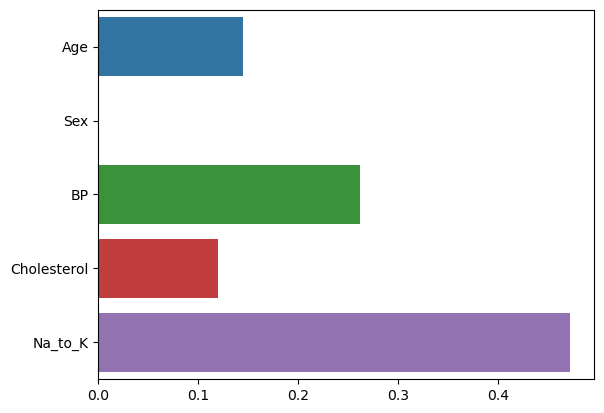

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=dtc.feature_importances_, y=feature_columns)
plt.show()

In [19]:
def change_Drug(x):
    if x== 'drugA':
        return 1
    if x== 'drugB':
        return 2
    if x== 'drugC':
        return 3
    if x== 'drugX':
        return 4
    if x== 'drugY':
        return 5

In [20]:
d_need_df['Drug_Category']= d_need_df['Drug'].apply(change_Drug)
d_need_df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Drug_Category
0,23,1,1,1,25.355,drugY,5
1,47,0,-1,1,13.093,drugC,3
2,47,0,-1,1,10.114,drugC,3
3,28,1,0,1,7.798,drugX,4
4,61,1,-1,1,18.043,drugY,5
...,...,...,...,...,...,...,...
195,56,1,-1,1,11.567,drugC,3
196,16,0,-1,1,12.006,drugC,3
197,52,0,0,1,9.894,drugX,4
198,23,0,0,0,14.020,drugX,4


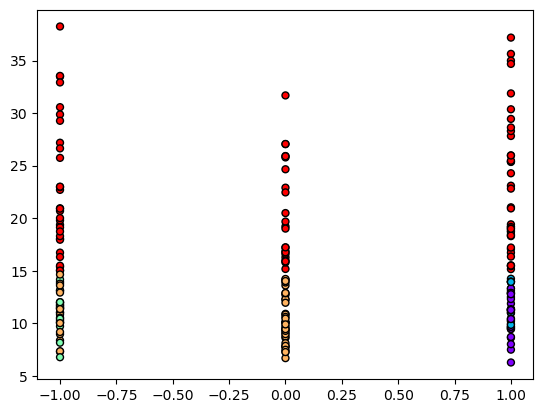

In [21]:
features = d_need_df[['Age','Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
targets = d_need_df['Drug_Category'].values

plt.scatter(features[:, 2], y=features[:, 4], c=targets, edgecolors='k', cmap='rainbow', s=25)
plt.show()

In [22]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow',
                           zorder=1)

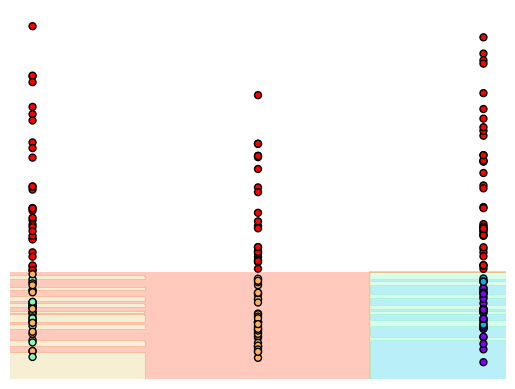

In [23]:
features, targets = d_need_df[['Age','Sex', 'BP', 'Cholesterol', 'Na_to_K']].values[:, [2,4]], d_need_df['Drug_Category'].values

dtc = DecisionTreeClassifier(random_state=124)
dtc.fit(features, targets)
visualize_boundary(dtc, features, targets)

In [26]:
features
targets

array([5, 3, 3, 4, 5, 4, 5, 3, 5, 5, 3, 5, 5, 5, 4, 5, 4, 1, 3, 5, 5, 5,
       5, 5, 5, 5, 5, 4, 5, 5, 4, 2, 4, 5, 4, 4, 1, 4, 4, 4, 5, 2, 5, 4,
       4, 4, 1, 3, 5, 5, 5, 4, 5, 5, 2, 3, 2, 5, 4, 5, 5, 1, 5, 4, 2, 5,
       1, 4, 5, 5, 2, 5, 4, 5, 5, 5, 1, 5, 1, 4, 2, 4, 3, 1, 3, 2, 4, 5,
       5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 1, 1, 3, 4, 5, 4, 4, 5, 2, 5,
       1, 4, 4, 4, 4, 5, 4, 4, 1, 5, 5, 5, 5, 5, 2, 5, 5, 4, 5, 4, 5, 5,
       4, 5, 5, 4, 2, 1, 2, 4, 1, 5, 2, 5, 1, 4, 4, 1, 4, 3, 1, 2, 4, 4,
       5, 3, 1, 5, 3, 4, 4, 2, 4, 5, 5, 5, 5, 4, 5, 1, 4, 4, 5, 5, 1, 5,
       1, 5, 5, 5, 5, 4, 4, 5, 5, 5, 2, 1, 5, 5, 5, 1, 5, 3, 5, 3, 3, 4,
       4, 4], dtype=int64)

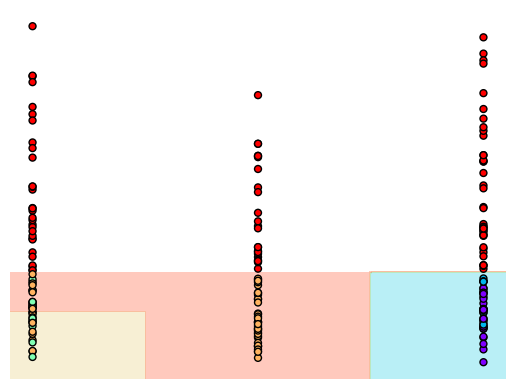

In [24]:
features, targets = d_need_df[['Age','Sex', 'BP', 'Cholesterol', 'Na_to_K']].values[:, [2,4]], d_need_df['Drug_Category'].values

dtc = DecisionTreeClassifier(random_state=124, min_samples_leaf=16)
dtc.fit(features, targets)

visualize_boundary(dtc, features, targets)